## Netflix Business Problem

* About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Data Cleaning

In [2]:
#Importing the data

data = pd.read_csv('netflix_data.csv')

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
data.shape

(8807, 12)

In [5]:
data.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping unnecessary columns from the dataset enhances clarity and focuses analysis on relevant features. In this case, 'description' and 'show id' are not necessary.

The numbers next to each column name represent the count of missing values in that column. For example, the "director" column has 2634 missing values.

Replacing NaN values in the specified columns with appropriate placeholders or imputed values helps mitigate the impact of missing data on the analysis.

To handle missing data, 'Unknown' is assigned for 'Director', 'Cast', and 'Country', while the mode is used for 'Date Added' and 'Rating'. For 'Duration', due to the mixed nature of TV shows and movies, no estimation is made, so 'Unknown' is assigned.

In [8]:
data.drop('show_id' , axis = 1 , inplace = True)

In [9]:
data.drop('description' , axis = 1 , inplace = True)

In [10]:
data.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [11]:
data['director'].fillna('Unknown' , inplace=True)
data['cast'].fillna('Unknown' ,inplace=True)
data['country'].fillna('Unknown' , inplace=True)
data['duration'].fillna("Unknown", inplace=True)

In [12]:
dates_mode = list(data['date_added'].value_counts().items())[0]
dates_mode

('January 1, 2020', 109)

In [13]:
data['date_added'].fillna(dates_mode[0] ,inplace=True)

In [14]:
ratings_mode = list(data['rating'].value_counts().items())[0]
ratings_mode

('TV-MA', 3207)

In [15]:
data['rating'].fillna(ratings_mode[0] , inplace=True)

In [16]:
data['rating'].value_counts().head()

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

For data consistency, it's recommended to drop any records with '74 min', '84 min', or '66 min' values in the 'rating' column.

In [17]:
data = data[data['rating'] != '74 min']
data = data[data['rating'] != '84 min']
data = data[data['rating'] != '66 min']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8804 non-null   object
 1   title         8804 non-null   object
 2   director      8804 non-null   object
 3   cast          8804 non-null   object
 4   country       8804 non-null   object
 5   date_added    8804 non-null   object
 6   release_year  8804 non-null   int64 
 7   rating        8804 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8804 non-null   object
dtypes: int64(1), object(9)
memory usage: 756.6+ KB


In [19]:
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Pre Processing the Data

Unnesting the data in columns like Actor, Director, and Country is necessary.

To accurately count the occurrences of each country, it's advisable to create a separate dataframe containing only the titles, types, and countries. This isolated dataframe facilitates clearer identification and analysis of country counts.

In [20]:
data.rename(columns={'release_year':'ReleaseYear','type':'Type','title':'Title','director':'Director','cast':'Cast','country':'country','date_added':'DateAdded','rating':'Ratings','duration':'Duration','listed_in':'ListedIn'},inplace=True)

In [21]:
def preprocessing(series):
    series = [x.strip() for x in series.split(',')]
    return series

In [22]:
country = data[['Type' , 'Title' ,'country', 'ReleaseYear' , 'DateAdded']]
country['country'] = country['country'].apply(preprocessing)
country = country.explode('country',ignore_index = True)

In [23]:
genre = data[['Type' , 'Title' , 'ListedIn' , 'ReleaseYear' , 'DateAdded']]
genre['ListedIn'] = genre['ListedIn'].apply(preprocessing)
genre = genre.explode('ListedIn',ignore_index = True)

In [24]:
cast = data[['Type' , 'Title' , 'Cast' , 'ReleaseYear' , 'DateAdded']]
cast['Cast'] = cast['Cast'].apply(preprocessing)
cast = cast.explode('Cast',ignore_index = True)

In [25]:
director = data[['Type' , 'Title' , 'Director' , 'ReleaseYear' , 'DateAdded']]
director['Director'] = director['Director'].apply(preprocessing)
director = director.explode('Director',ignore_index = True)

In [26]:
tidy_data = data
tidy_data['Cast'] = tidy_data['Cast'].apply(preprocessing)
tidy_data = tidy_data.explode('Cast' , ignore_index = True)
tidy_data['Director'] = tidy_data['Director'].apply(preprocessing)
tidy_data = tidy_data.explode('Director' , ignore_index = True)
tidy_data['ListedIn'] = tidy_data['ListedIn'].apply(preprocessing)
tidy_data = tidy_data.explode('ListedIn' , ignore_index = True)
tidy_data['country'] = tidy_data['country'].apply(preprocessing)
tidy_data = tidy_data.explode('country' , ignore_index = True)

In [27]:
tidy_data['Type'] = tidy_data['Type'].astype('category')
tidy_data['Ratings'] = tidy_data['Ratings'].astype('category')
tidy_data['ListedIn'] = tidy_data['ListedIn'].astype('category')
tidy_data['country'] = tidy_data['country'].astype('category')

The tidy data frame will include multiple entries for each TV show or movie, reflecting various records for actors, directors, countries, and other attributes.

In [28]:
tidy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202062 entries, 0 to 202061
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Type         202062 non-null  category
 1   Title        202062 non-null  object  
 2   Director     202062 non-null  object  
 3   Cast         202062 non-null  object  
 4   country      202062 non-null  category
 5   DateAdded    202062 non-null  object  
 6   ReleaseYear  202062 non-null  int64   
 7   Ratings      202062 non-null  category
 8   Duration     202062 non-null  object  
 9   ListedIn     202062 non-null  category
dtypes: category(4), int64(1), object(5)
memory usage: 10.0+ MB


In [29]:
data['Type'] = data['Type'].astype('category')
data['Ratings'] = data['Ratings'].astype('category')
data['ListedIn'] = data['ListedIn'].astype('category')
data['country'] = data['country'].astype('category')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Type         8804 non-null   category
 1   Title        8804 non-null   object  
 2   Director     8804 non-null   object  
 3   Cast         8804 non-null   object  
 4   country      8804 non-null   category
 5   DateAdded    8804 non-null   object  
 6   ReleaseYear  8804 non-null   int64   
 7   Ratings      8804 non-null   category
 8   Duration     8804 non-null   object  
 9   ListedIn     8804 non-null   category
dtypes: category(4), int64(1), object(5)
memory usage: 576.0+ KB


## Non Graphical Analysis

For a comprehensive analysis, it may be beneficial to use the original (uncleaned) data for certain columns such as 'type', 'release year', 'date added', 'ratings', and 'duration'.

In [31]:
data['Type'].value_counts()

Movie      6128
TV Show    2676
Name: Type, dtype: int64

In [32]:
data['Type'].nunique()

2

The dataset predominantly consists of two types of content: movies (70%) compared to TV shows (30%). This indicates potential audience preferences and informs content acquisition and curation strategies for Netflix.

In [33]:
data['DateAdded'] = pd.to_datetime(data['DateAdded'] )

In [34]:
data['DateAdded'].value_counts()

2020-01-01    120
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: DateAdded, Length: 1714, dtype: int64

In [35]:
data['DateAdded'].nunique()

1714

The dataset illustrates a varied pattern of content additions to Netflix, with January 1, 2020, and November 1, 2019, being the most common addition dates. This suggests periodic updates to the platform's content catalog, ensuring ongoing viewer engagement.

In [36]:
data[data['DateAdded'] == data['DateAdded'].min()]

,Type,Title,Director,Cast,country,DateAdded,ReleaseYear,Ratings,Duration,ListedIn
5957,Movie,To and From New York,Sorin Dan Mihalcescu,"[Barbara King, Shaana Diya, John Krisiukenas, ...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers"


In [37]:
data[data['DateAdded'] == data['DateAdded'].max()]

,Type,Title,Director,Cast,country,DateAdded,ReleaseYear,Ratings,Duration,ListedIn
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown],United States,2021-09-25,2020,PG-13,90 min,Documentaries


The dataset spans 13 years and includes around 1714 days, indicating sporadic additions of new movies. Notably, the earliest addition is 'To and From New York', while the most recent is 'Dick Johnson Is Dead'.

In [38]:
data['ReleaseYear'].value_counts()

2018    1147
2017    1031
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: ReleaseYear, Length: 74, dtype: int64

The series above indicates that the majority of content on Netflix was released between the years 2016 and 2020. This trend suggests heightened interest from viewers during this period, which might be due to the release of popular titles directly to Netflix or increased consumption of digital content.

In [39]:
data['ReleaseYear'].nunique()

74

In [40]:
data['ReleaseYear'].max() , data['ReleaseYear'].min()

(2021, 1925)

Netflix's content library has releases spanning from 1925 to 2021, with the earliest additions dating back to 1925 and the latest additions representing releases from 2021.

In [41]:
data[data['ReleaseYear'] != data['DateAdded'].dt.year].shape

(5564, 10)

Approximately 60% of the content in the dataset have a discrepancy between their release year and the date they were added to Netflix, indicating potential delays or considerations in acquiring rights. The remaining 40% may suggest either direct releases on Netflix or immediate acquisition of rights due to popularity.

In [42]:
data['Ratings'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: Ratings, dtype: int64

With around 3200 records rated 'TV-MA', Netflix's content appears skewed towards mature audiences, overshadowing ratings like 'TV-PG' and 'TV-14'.

In [43]:
data['Duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: Duration, Length: 220, dtype: int64

Utilizing preprocessed data for columns such as director, cast, country, and listed_in can offer valuable insights, particularly since multiple individuals or countries may be involved in the creation of a single film or show.

In [44]:
director['Director'].value_counts()

Unknown           2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: Director, Length: 4993, dtype: int64

In [45]:
director['Director'].nunique()

4993

In [46]:
data[data['Director'] == 'Unknown'].shape[0]

2634

Among the approximately 4993 unique directors in the dataset, around 2600 records have an unknown director. This implies that a significant portion of TV shows/movies lacks director information. Additionally, Rajiv Chilaka has directed the highest number of TV shows/movies.

In [47]:
director[director['Director'] == 'Rajiv Chilaka']['Type'].value_counts()

Movie    22
Name: Type, dtype: int64

This suggests that Rajiv Chilaka mainly directs movies.

In [48]:
cast['Cast'].value_counts()

Unknown                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Takahiro Sakurai            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: Cast, Length: 36440, dtype: int64

In [49]:
cast[cast['Cast'] == 'Anupam Kher']['Type'].value_counts()

Movie      42
TV Show     1
Name: Type, dtype: int64

Out of over 8,000 TV shows/movies and nearly 37,000 actors, Anupam Kher has appeared in 42 movies and 1 TV show, indicating his significant presence in the known cast.

In [50]:
country['country'].value_counts()

United States     3687
India             1046
Unknown            831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 124, dtype: int64

The majority of content on Netflix originates from the United States, followed by India and the United Kingdom. However, a significant portion is listed as "Unknown," suggesting incomplete or unspecified country data.

In [51]:
country[country['country'] == 'United States']['Type'].value_counts()

Movie      2749
TV Show     938
Name: Type, dtype: int64

The United States contributes more movies than TV shows to Netflix's content library.

In [52]:
country[country['country'] == 'India']['Type'].value_counts()

Movie      962
TV Show     84
Name: Type, dtype: int64

In Netflix's Indian content, there are around 10 times more movies than TV shows, while in the USA, the split is approximately 66% movies to 33% TV shows.

In [53]:
genre['ListedIn'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

The genre "International Movies" is the most common category in Netflix's content, followed by "Dramas" and "Comedies".

##  Visual Analysis

**Uni Variate Plots**

* Distribution of 'Type' (Movie/TV Show):

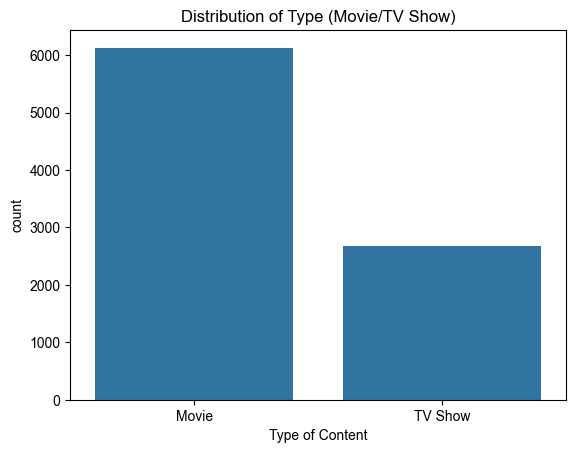

In [54]:
sns.countplot(data = data , x='Type')
sns.set(style="darkgrid")
plt.xlabel('Type of Content')
plt.title('Distribution of Type (Movie/TV Show)')
plt.show()

The above count illustrates that approximately two-thirds of the content added to Netflix consists of movies, indicating a dominant presence of films in the platform's content offerings.

* Distribution of Release Years for Movies and TV Shows

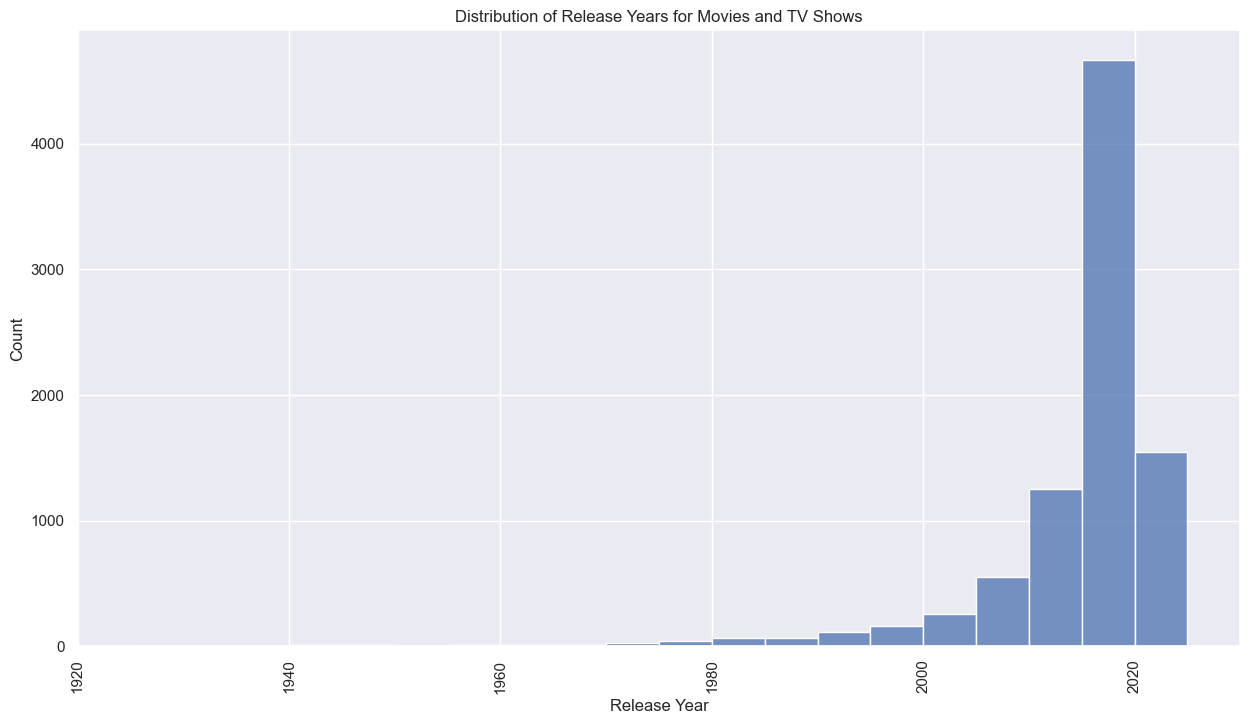

In [55]:
plt.figure(figsize = (15 , 8))
sns.set(style="darkgrid")
bins = np.arange(data['ReleaseYear'].min() , data['ReleaseYear'].max()+ 5 ,5)
sns.histplot(data = data , x='ReleaseYear' , bins=bins )
plt.xlabel('Release Year')
plt.title('Distribution of Release Years for Movies and TV Shows')
plt.xticks(rotation = 90)
plt.show()

The histogram suggests a significant influx of Movies and TV-Shows released between 2016 and 2020, coinciding with a notable presence of these films in the Netflix catalog during that period.

* Distribution of Content Added Dates

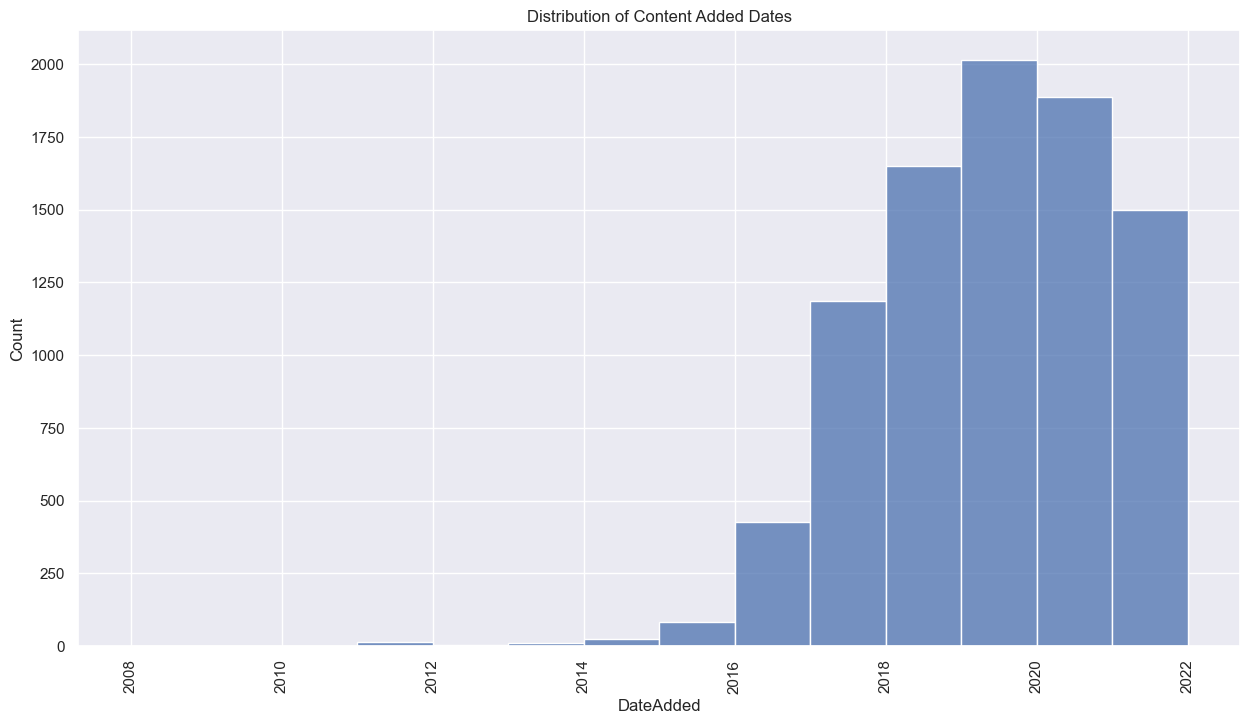

In [56]:
plt.figure(figsize = (15 , 8))
sns.set(style="darkgrid")
bins = np.arange(data['DateAdded'].dt.year.min() , data['DateAdded'].dt.year.max() +2,1)
sns.histplot(data = data , x=data['DateAdded'].dt.year,bins=bins)
plt.xlabel('DateAdded')
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation = 90)
plt.show()

The surge in the addition of movies and TV shows to the Netflix catalog between 2019 and 2022 coincides with the onset of the COVID-19 pandemic, suggesting a possible correlation.

* Distribution of Content Added by Country

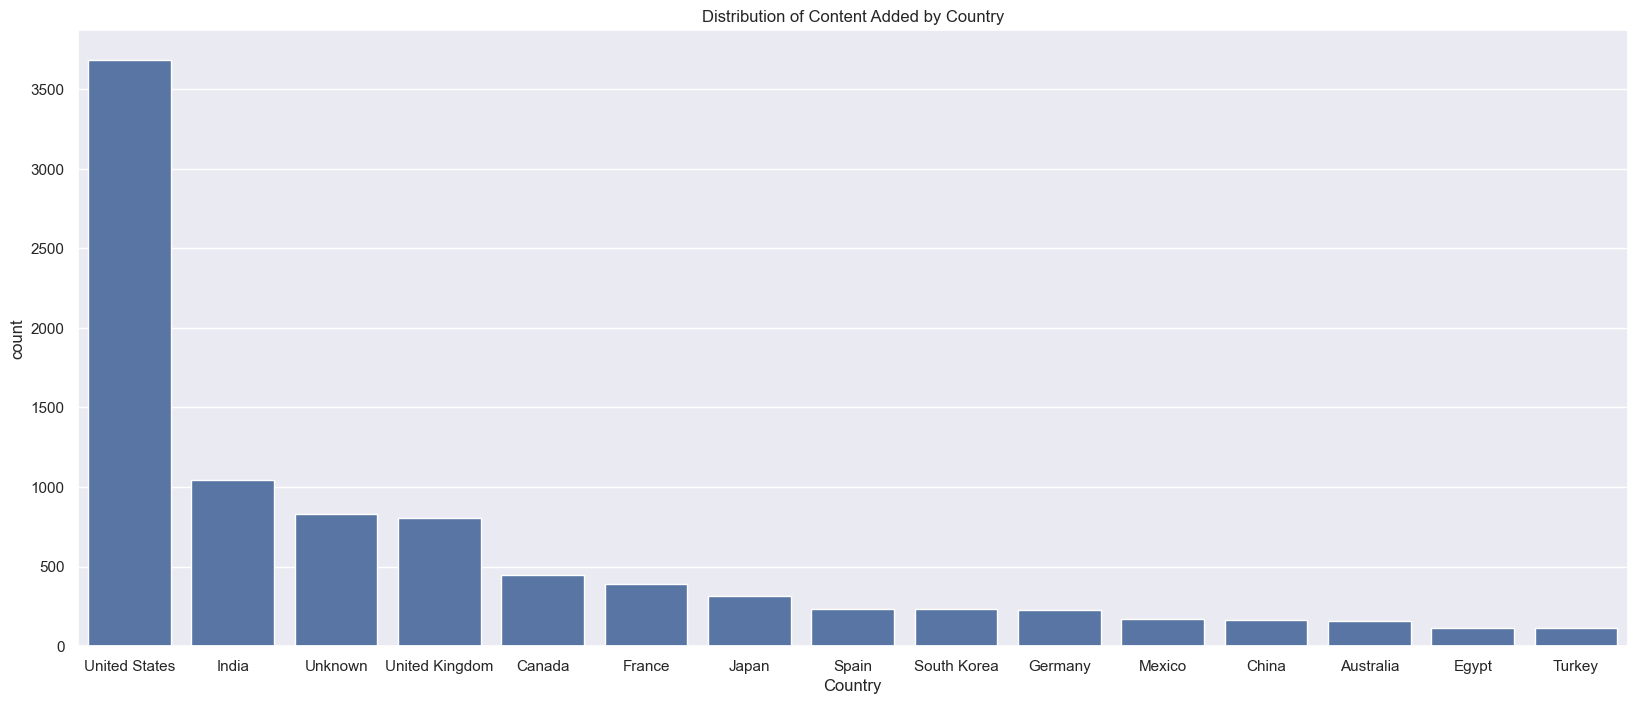

In [57]:
plt.figure(figsize = (20 , 8))
country_count = country['country'].value_counts().index[0:15]
sns.countplot(data = country , x = 'country'  , order = country_count )
plt.xlabel('Country')
plt.title('Distribution of Content Added by Country')
plt.show()

The count plot above showcases the top 15 countries contributing to content production, with the United States leading the list followed by India.

* Distribution of Content by Genre

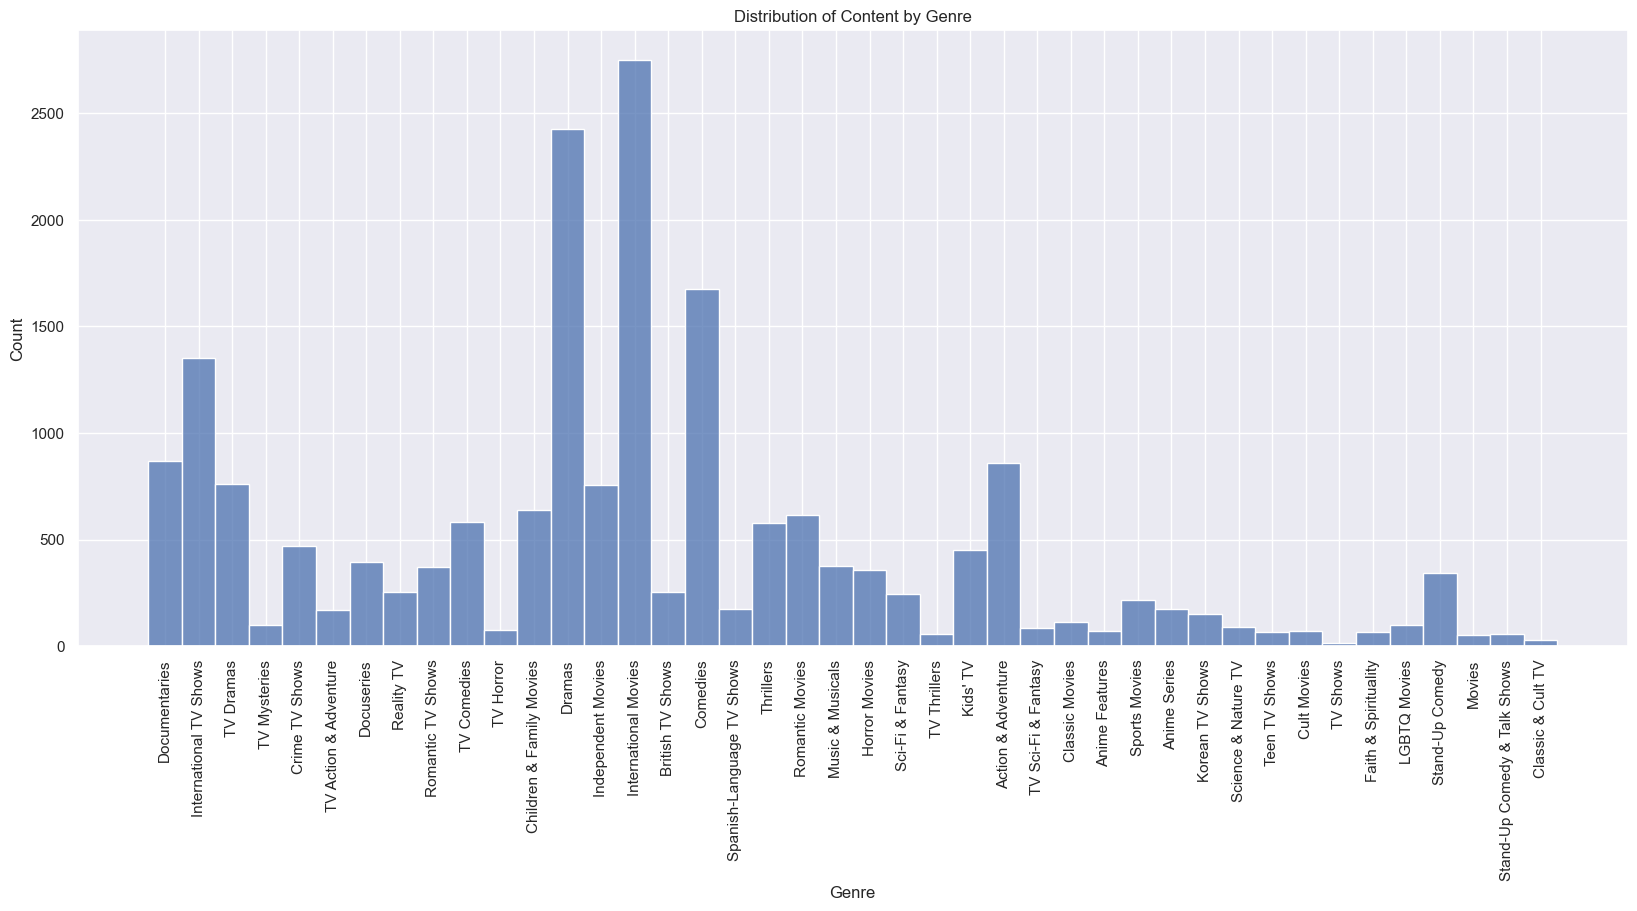

In [58]:
plt.figure(figsize = (20 , 8))
sns.set(style="darkgrid")
sns.histplot(data = genre , x='ListedIn' )
plt.xlabel('Genre')
plt.title('Distribution of Content by Genre')
plt.xticks(rotation = 90)
plt.show()

The plot above illustrates the distribution of content by genre, indicating that international movies dominate the distribution.Next to it, dramas are the second most prevalent genre in the distribution.

**Bi Variate Plots**

* Relationship between Release Year and Date Added to Netflix

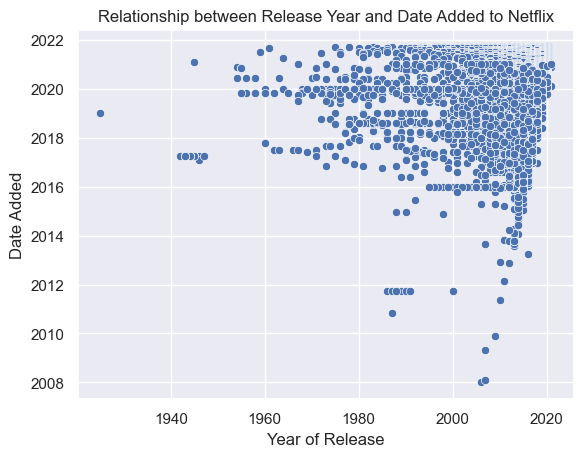

In [59]:
sns.scatterplot(data=data, x='ReleaseYear', y='DateAdded')
sns.set_theme(style="darkgrid")
plt.xlabel('Year of Release')
plt.ylabel('Date Added')
plt.title("Relationship between Release Year and Date Added to Netflix")
plt.show()

The top-right section of the plot indicates that recently released movies are being added to Netflix shortly after their release dates. This suggests that many new movies are either being released directly on Netflix or added to its catalog shortly after their release.

* Comparing the distribution of Type (Movie/TV Show) across different Country values.

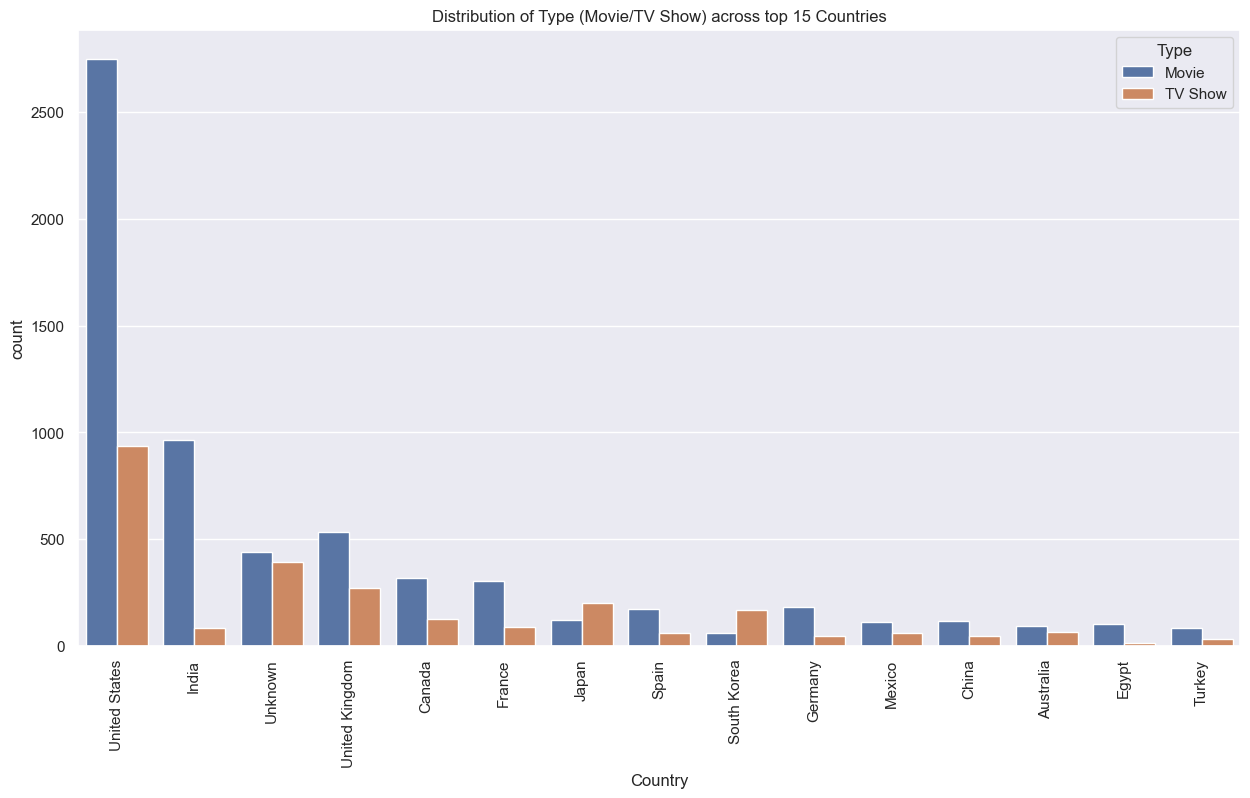

In [60]:
plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
country_count = country['country'].value_counts().index[0:15]
sns.countplot(data =  country , x = 'country' , order = country_count , hue = 'Type')
plt.xlabel('Country')
plt.title('Distribution of Type (Movie/TV Show) across top 15 Countries')
plt.xticks(rotation = 90)
plt.show()

* Relationship between Release Year and Date Added Over Time

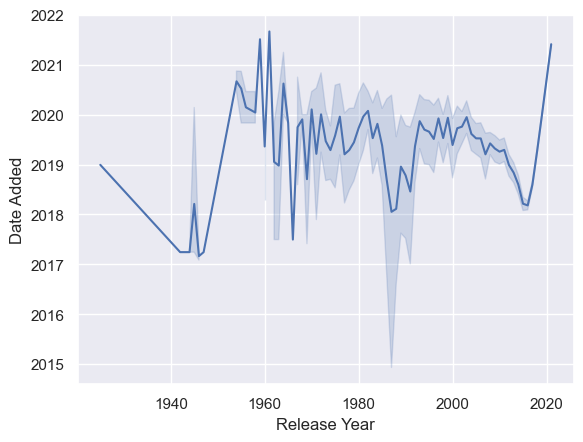

In [61]:
sns.lineplot(data = data , x = 'ReleaseYear' , y = 'DateAdded')
sns.set_theme(style="darkgrid")
plt.xlabel('Release Year')
plt.ylabel('Date Added')
plt.show()

In recent years, there has been a noticeable increase in the number of releases, with the date added to Netflix becoming increasingly closer to the release year. This trend suggests a growing familiarity and acceptance of OTT (over-the-top) platforms for content consumption.

In [62]:
director_order =  director['Director'].value_counts().index[1:11]

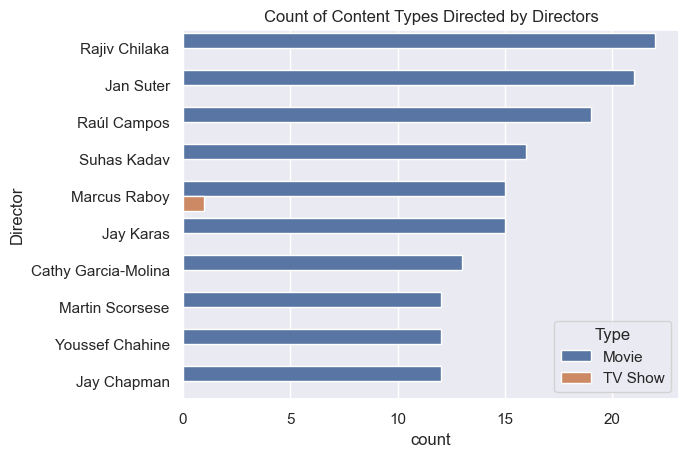

In [63]:
sns.countplot(data = director , y = 'Director', order = director_order , hue = 'Type')
sns.set_theme(style="darkgrid")
plt.title('Count of Content Types Directed by Directors')
plt.show()

The plot illustrates the count of different content types directed by various directors, indicating that movies are the most frequently directed content type among the top listed directors.

**Multi Variate Plots**

* Comparing the distribution of Top Genre across different Year.

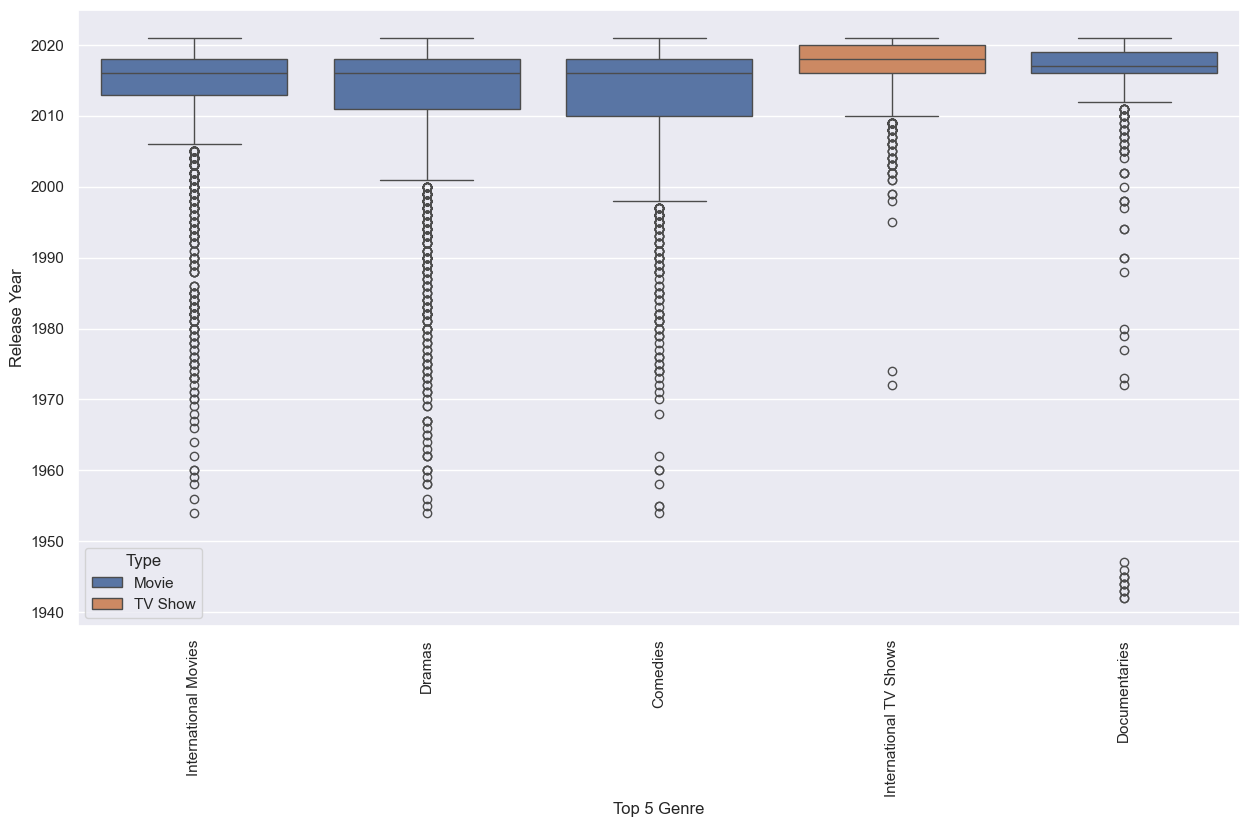

In [64]:
genre_count = genre['ListedIn'].value_counts().index[0:5]
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,8))
sns.boxplot(data = genre , x = 'ListedIn' , y = 'ReleaseYear', order = genre_count , hue = 'Type')
plt.ylabel('Release Year')
plt.xlabel('Top 5 Genre')
plt.xticks(rotation = 90)
plt.show()

Around the mid-2010s, international movies were prevalent on Netflix, particularly in the genre category. However, comedies and dramas exhibited a broader range of release years across the platform. In the latter part of the decade, there was a notable increase in the release of international TV shows compared to international movies.

In the two plots above, we analyze the distribution of content types (Movie/TV Show) across various countries and the distribution of top genres across different years. By limiting the categories to the top 15 countries and top 5 genres, we aim to gain insights into the overall trends.

* Box Plot of Content Type by Release Year and Top Rating

In [65]:
ratings = data['Ratings'].value_counts().reset_index()
top_ratings = ratings.head(3)
top_ratings

,index,Ratings
0,TV-MA,3211
1,TV-14,2160
2,TV-PG,863


In [66]:
top_ratings = data['Ratings'].value_counts().head(3).index.tolist()
filtered_data = data[data['Ratings'].isin(top_ratings)]

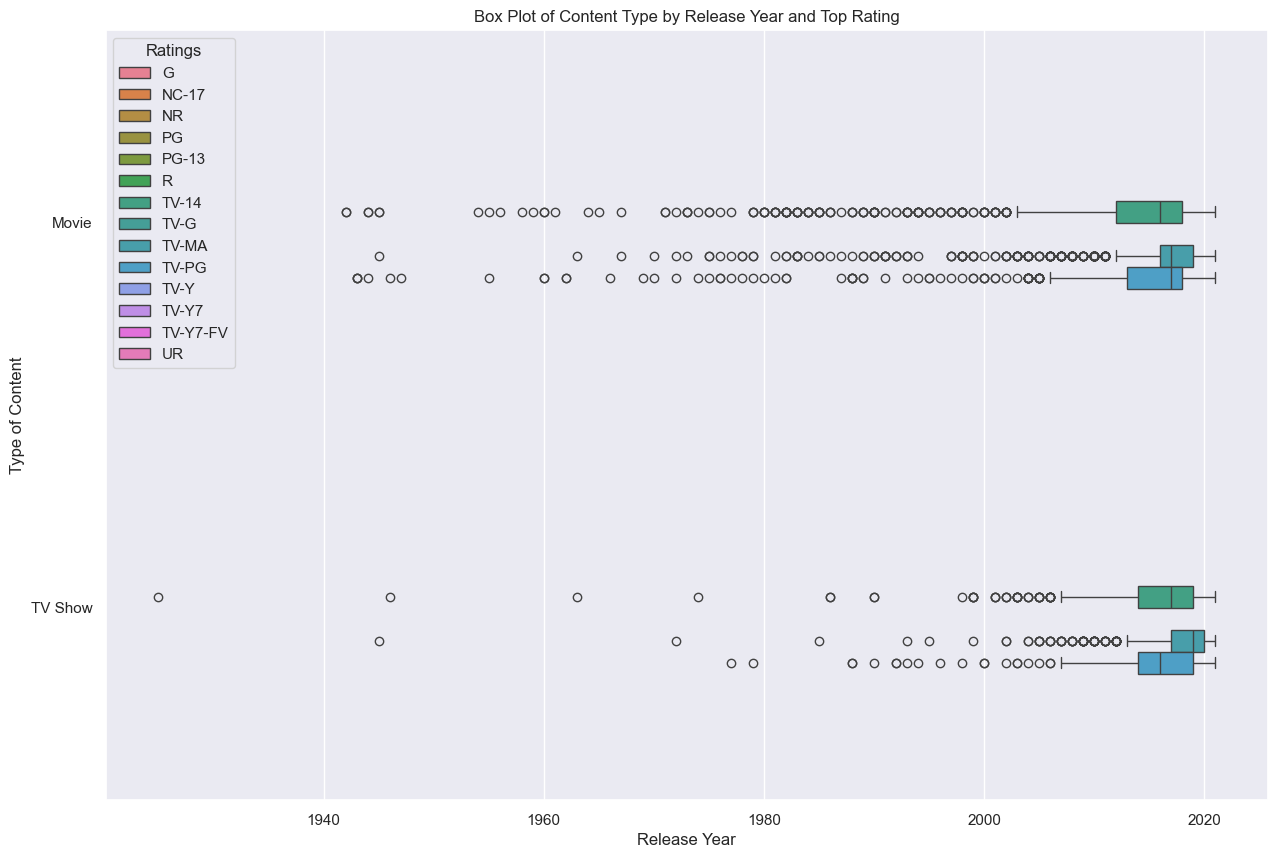

In [67]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
sns.boxplot(data=filtered_data, x='ReleaseYear', y='Type', hue='Ratings')
plt.xlabel('Release Year')
plt.ylabel('Type of Content')
plt.title('Box Plot of Content Type by Release Year and Top Rating')
plt.show()

The box plot above reveals a notable increase in the addition of TV-MA rated mature audience content to Netflix during the latter half of the 2010 decade. This trend suggests a growing audience of mature viewers on Netflix, particularly for TV shows, indicating a shift towards mature content consumption on the platform.

In [68]:
heatmap_data = data[['DateAdded' ,'ReleaseYear']]
heatmap_data['DateAdded'] = heatmap_data['DateAdded'].dt.year

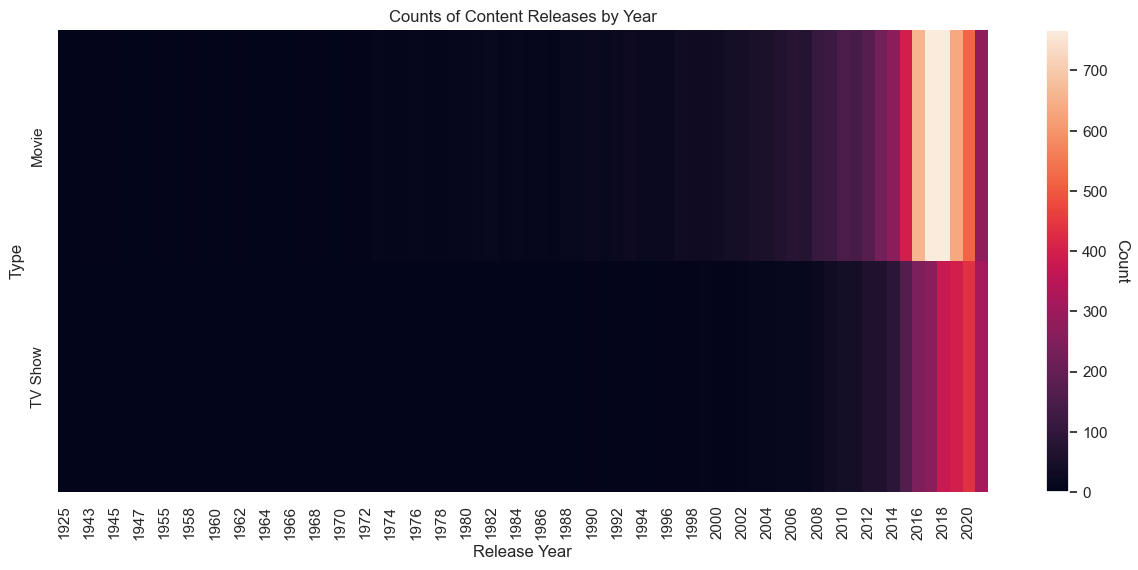

In [69]:
release_year_counts = data.groupby(["Type", "ReleaseYear"]).size().unstack()

plt.figure(figsize=(15, 6))
sns.set_theme(style="darkgrid")

heatmap = sns.heatmap(data=release_year_counts)
heatmap.collections[0].colorbar.remove()

cbar = plt.colorbar(heatmap.collections[0], ax=heatmap)
cbar.set_label('Count', rotation=270, labelpad=15)
plt.xlabel("Release Year")
plt.ylabel("Type")
plt.title("Counts of Content Releases by Year")
plt.show()

Based on the heatmap, movie releases appear predominant across most years, with an increasing trend in total releases over time. TV show releases may exhibit a different distribution, while other content types likely have a smaller presence. Additional context on the color legend and data source would enhance interpretation.

## Insights

#### Based on Non Graphical Analysis

1. **Content Preference and Acquisition Strategy**:
   - Netflix prioritizes movie acquisition (70% vs. 30% TV shows), aligning updates with key dates for viewer engagement.
   
2. **Content Diversity and Release Patterns**:
   - Frequent  content addition to ensure a refreshed library.
   
3. **Audience Targeting and Content Rating**:
   - TV-MA content dominates (60%), catering to audiences  above ages 18
   
4. **Content Duration and Viewer Preferences**:
   - Netflix offers diverse durations, acknowledging viewer preferences for short-form content like movies and long-form content like TV-Shows with duration spanning over  1 season - 3 seasons .
   
5. **Director and Cast Information**:
    - Directors like Rajiv Chilaka and Jan Suter, among others, have directed nearly 20 movies each. Meanwhile, Anupam Kher has appeared in approximately 40 movies and TV shows combined.
   
6. **Regional Content Strategy**:
   - Netflix adapts content offerings based on regional preferences, emphasizing "International Movies" to appeal globally.

#### Based on Visual Analysis

1. **Content Dominance and COVID-19 Impact**:
   - Netflix saw a surge in movie additions during 2019-2022, likely responding to increased demand of digital content during the pandemic.
   
2. **Content Consumption Trends**:
   - The rise in TV shows on Netflix reflects increasing popularity and a shift towards serialized storytelling, catering to evolving viewer preferences.

3. **Geographical Contribution and Genre Preference**:
   - The US and India lead content production, reflecting Netflix's global focus. International movies are favored, showcasing Netflix's commitment to cultural diversity.

4. **Release Patterns and OTT Adoption**:
   - Recent movies are added promptly, indicating a shift in distribution strategies favoring OTT platforms.

5. **Directorial Influence and Genre Trends**:
   - Movies are frequently directed, suggesting their importance. Comedy and drama release years vary, while international movies remain consistent.

6. **Content Rating Trends**:
   - TV-MA content surged in the latter half of the 2010s, showing Netflix's response to a growing audience seeking mature content.

## Recommendations

1. **Content Acquisition Strategy**:
   - Netflix should continue prioritizing movie acquisitions, given their dominance in the platform's content offerings. However, they should also invest in acquiring a diverse range of TV shows to cater to the growing popularity of serialized storytelling.
   - Consider partnering with production studios to secure exclusive rights to new movie releases or negotiate early access to popular titles for immediate streaming on Netflix.

2. **Regional Content Strategy**:
   - Given the significant contributions from the United States and India, Netflix should focus on expanding its library of content from these regions to cater to diverse global audiences.

3. **Genre Expansion**:
   - While international movies and dramas are popular, Netflix should also explore expanding its offerings in other genres like comedy, thriller, and documentary to cater to a multitude of audience.
   - Invest in producing high-quality original content across diverse genres to attract and retain subscribers.

4. **Content Consumption Trends**:
   - Given the rise in demand for mature audience content, Netflix should continue investing in producing more mature TV shows and movies to cater to this audience segment.
   - Explore partnerships with content creators and filmmakers known for producing mature-themed content to ensure a steady supply of relevant programming.

5. **Release Patterns**:
   - Addition of new anticipated movies to the platform after their theatrical release by strengthening relationships with movie studios and distributors.
   - Invest in marketing campaigns to promote newly added titles and capitalize on the buzz surrounding their theatrical release.

Overall, Netflix should maintain a balanced content strategy that includes acquiring a diverse range of movies and TV shows, expanding its regional offerings, exploring new genres, and catering to evolving viewer preferences for mature-themed and serialized content.